# physics760 - Problem Set 4

### Team:
- Sumin Alff-Kim : 3282322
- Lennart Voorgang: 3124372

### Code
- [Repository](https://github.com/lennartvrg/ComputationalPhysics)
- [Subdirectory for this assignment](https://github.com/lennartvrg/ComputationalPhysics/tree/main/4%20-%20The%20Ising%20Model%20in%201D)
- CommitID: **c7db2858e438366160cbe623bb5b97ee8d371e51**

### Dependencies
- CMake 3.25+
- Thread building-blocks library. **ubuntu**: `sudo apt-get install libtbb-dev`. **macOS**: `brew install tbb`.
- `c++23` comptabile compiler **macOS**: As the Apple version of clang does not support parallel algorithms, one must install `gcc` via homebrew: `brew install gcc`.

### Run the `c++` code
- `cd 4\ -\ The\ Ising\ Model\ in\ 1D/`
- `mkdir build && cd build`
- `cmake .. && make && cp main ..`
- `cd .. && ./main`
- You should now have an output directory with several `CSV` files within it

### Run the `python` code
- Create the environment with `python3 -m venv .venv`
- To active the environment run `source .venv/bin/active` (Linux)
- To Install the required dependencies run `pip install -r requirements.txt`
- Run `jupyter notebook`

In [26]:
# Standard imports for computational physics
from scipy.odr import Model, RealData, ODR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'scatter', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

## The Ising Model in 1D

<font color='blue'> **Q. As written there are three dimensionful parameters, J, h, and β = 1/T . Find a set of TWO dimensionless parameters and rewrite the exact result (4) in terms of those variables.**</font>

We choose $\alpha = \frac{J}{T}$ and $\gamma = \frac{h}{T}$ as our dimensionless variables:
\begin{align}
    \lambda_\pm = e^{\alpha} \left( \cosh{\gamma} \pm \sqrt{\sinh^2{\gamma} + e^{-4 \alpha}} \right)
\end{align}

<font color='blue'> **Q. The expected net magnetization $M$ (which is already dimensionless) is given by $\langle M \rangle =\frac{\partial}{\partial h} \log{Z[\beta, J, H]}$. Derive an expression for $\langle M \rangle$ in terms of your $2$ chosen dimensionless variables by actually differentiating $Z$. You don’t have to get it to as simple a form as possible, but make sure it’s simple enough to easily program as a function of your $2$ dimensionless variables.**</font>

For $\langle M \rangle$ we get
\begin{align}
    \langle M \rangle &= T \frac{\partial}{\partial h}  logZ[\beta,J,h]\\
        &= T \frac{\partial}{\partial h}  logZ[\beta,J,h]\\
        &= T \frac{1}{Z[\beta,J,h]}\frac{\partial Z[\beta,J,h]}{\partial h}.
\end{align}

Solving the term with $Z$
\begin{align}
    \frac{\partial Z[\beta,J,h]}{\partial h} &=N\left(\lambda_+^{N−1}\frac{\partial\lambda_+}{\partial h} + \lambda_-^{N−1}\frac{\partial \lambda_-}{\partial h} \right)
\end{align}
and then $\lambda_\pm$
\begin{align}
​   \frac{\partial}{\partial h}{\lambda_\pm} = \frac{1}{T} \frac{\partial}{\partial \gamma}{\lambda_\pm} &= \frac{e^\alpha}{T} \frac{\partial}{\partial \gamma} \left( \cosh{\gamma} \pm \sqrt{\sinh^2{\gamma} + e^{-4\alpha}} \right) \\
        &= \frac{e^\alpha}{T} \left( \sinh{\gamma} \pm \frac{\sinh{2\gamma}}{\sqrt{\sinh^2{\gamma} + e^{-4\alpha}}} \right).
\end{align}

Putting it back into the first expression
\begin{align}
\langle M \rangle &= N T \cdot \frac{\left(\lambda_+^{N−1} \frac{\partial\lambda_+}{\partial h} + \partial\lambda_-^{N−1} \frac{\partial\lambda_-}{\partial h} \right)}{\lambda_+^N + \lambda_-^N} \\
    &= N \cdot \frac{\left(\lambda_+^{N−1} \frac{\partial\lambda_+}{\partial\gamma} + \partial\lambda_-^{N−1} \frac{\partial\lambda_-}{\partial\gamma} \right)}{\lambda_+^N + \lambda_-^N}.
\end{align}

For the magnetization per spin we get
\begin{align}
    \langle m \rangle = \langle \frac{M}{N} \rangle = \frac{\left(\lambda_+^{N−1} \frac{\partial\lambda_+}{\partial\gamma} + \lambda_-^{N−1} \frac{\partial\lambda_-}{\partial\gamma} \right)}{\lambda_+^N + \lambda_-^N}
\end{align}

<font color='blue'>**Q. On a single figure plot $\langle  m = M/N\rangle$ (using the expression you just found) for $J = 0.75$, $\beta = 1$ for $h \in [−1, +1]$ for $N \in {1, 2, 4, 8, 16, \infty}$ using what you found for $\langle M \rangle$ in the previous part and the exact $m$.**</font>

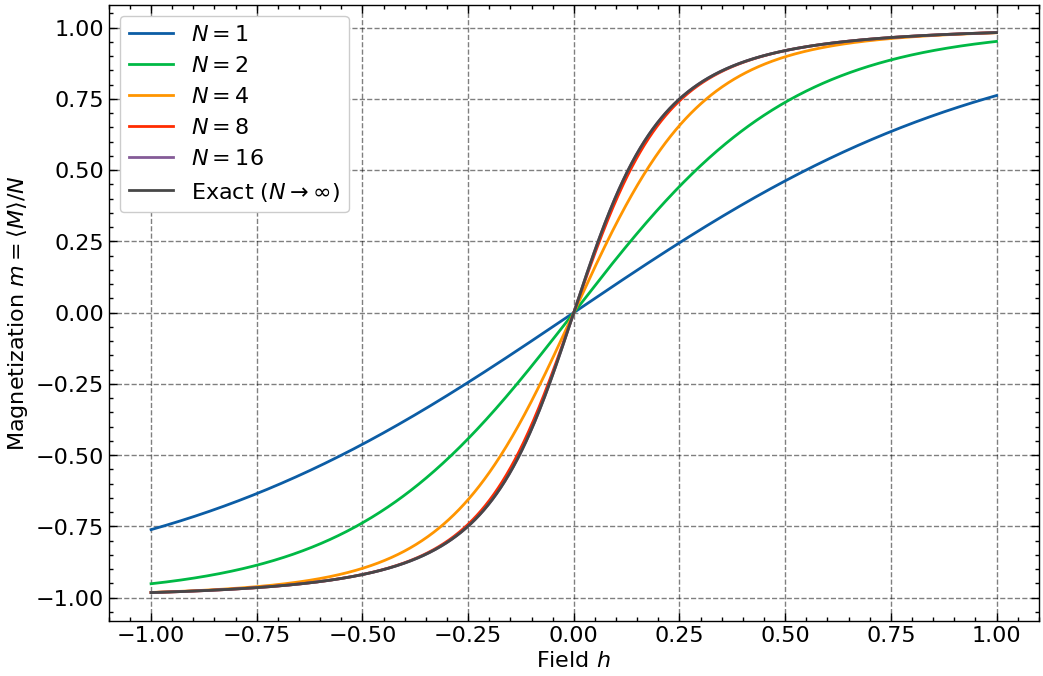

In [27]:
def exact_m(alpha, gamma):
    return np.sinh(gamma) / np.sqrt(np.sinh(gamma)**2 + np.exp(-4 * alpha))

def lambda_plus(alpha, gamma):
    return np.exp(alpha) * (np.cosh(gamma) + np.sqrt(np.sinh(gamma)**2 + np.exp(-4 * alpha)))

def lambda_minus(alpha, gamma):
    return np.exp(alpha) * (np.cosh(gamma) - np.sqrt(np.sinh(gamma)**2 + np.exp(-4 * alpha)))

def del_lambda_plus(alpha, gamma):
    return np.exp(alpha) * (np.sinh(gamma) + np.sinh(2 * gamma) / (2 * np.sqrt(np.sinh(gamma)**2 + np.exp(-4 * alpha))))

def del_lambda_minus(alpha, gamma):
    return np.exp(alpha) * (np.sinh(gamma) - np.sinh(2 * gamma) / (2 * np.sqrt(np.sinh(gamma)**2 + np.exp(-4 * alpha))))

def magnetization_per_spin_finite_N(alpha, gamma, N):
    numerator = lambda_plus(alpha, gamma)**(N - 1) * del_lambda_plus(alpha, gamma) + lambda_minus(alpha, gamma)**(N - 1) * del_lambda_minus(alpha, gamma)
    denominator = lambda_plus(alpha, gamma)**N + lambda_minus(alpha, gamma)**N
    return numerator / denominator


J = 0.75
T = 1

h_values = np.linspace(-1, 1, num=1000)
fig, ax = plt.subplots()

for N in [1, 2, 4, 8, 16, np.inf]:
    if N == np.inf:
        ax.plot(h_values, exact_m(J / T, h_values / T), '-', label=f'Exact ($N \\rightarrow \\infty$)')
    else:
        ax.plot(h_values, magnetization_per_spin_finite_N(J / T, h_values / T, N), '-', label=f'$N = {N}$')

ax.set_xlabel("Field $h$")
ax.set_ylabel("Magnetization $m = \\langle M \\rangle / N$")
ax.legend()

<font color='blue'>**Q. Implement a function which, given the dimensionless parameters you picked and a configuration $\sigma$ computes the action $S$. You can put the parameters in as arguments, or make the function a class member and pass the parameters into the class constructor, or whatever; the organization of the code is up to you.**</font>

Implementation for the Energy and Magnetization is in `src/lattice_1d.cpp` and the implementation for the action is in `src/lattice.cpp`. This way future implementations for the 2D lattice can reuse the code.

<font color='blue'>**Q. Implement a function which, given the dimensionless parameters, a configuration $\sigma$, and a location $x$, computes $\Delta S(\sigma, x)$. But $\textit{don't}$ implement this by just calling $S$ twice and subtracting; there is a much much faster way. The computational cost of evaluating $S$ scales with the number of lattice sites; you should find an implementation of $\Delta S$ that doesn’t scale that way. (Hint: there are a LOT of cancellations!)**</font>

Since only the spin $\sigma$ at location $x$ before it is flipped and its direct neighbours at $x \pm 1$ contribute, we simply calculate the energy and magnetization differences.
\begin{align}
    \Delta M &= -2 \cdot \sigma_{x} \\
    \Delta E &= 2 J \cdot \sigma_{x} \left( \sigma_{x-1} + \sigma_{x+1} \right).
\end{align}
The implementation of these deltas may be found in `src/lattice_1d.cpp` and is combined into $\Delta S$ in `src/lattice.cpp`.

<font color='blue'>**Q. Run your implementations for $S$ and $\Delta S$ on larger and larger lattices, measuring how much time an evaluation takes. (You might need to evaluate multiple times to get a reliable timing.) Create a persuasive figure that shows the linear scaling of the cost of $S$ with the lattice size but the essentially constant cost of evaluating $\Delta S$. Note that you might have to go to pretty big lattices before the asymptotic scaling is apparent.**</font>

We increase the lattice size from $50\,000$ to $5\,000\,000$ in steps of $50\,000$ and measure every lattice size $20$ times. From these $20$ experiments we take the mean and uncertainty and plot them against the lattice size. As one can see the action $S$ has a linear scaling with the lattice size while $\Delta S$ is constant.

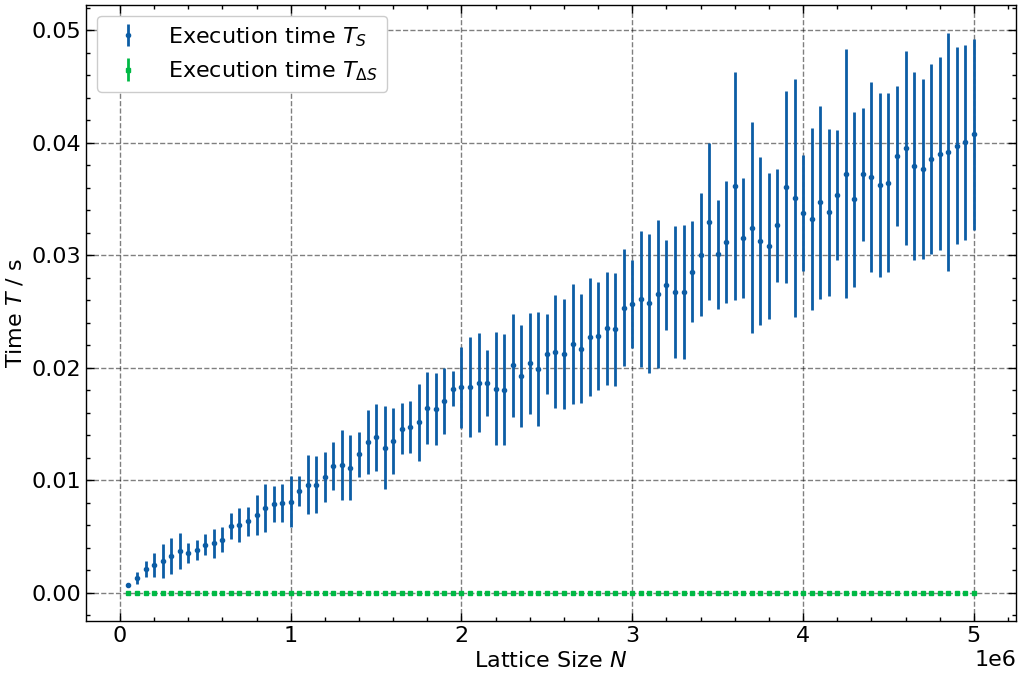

In [28]:
lattice_scaling_data = pd.read_csv('output/lattice_scaling.csv')
fig, ax = plt.subplots()

ax.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['Action'] * 10**(-9), yerr=lattice_scaling_data['DeltaAction'] * 10**(-9), label='Execution time $T_S$')
ax.errorbar(lattice_scaling_data['Lattice'], lattice_scaling_data['DiffAction'] * 10**(-9), yerr=lattice_scaling_data['DeltaDiffAction'] * 10**(-9), label='Execution time $T_{\\Delta S}$')

ax.set_xlabel('Lattice Size $N$')
ax.set_ylabel('Time $T$ / s')

ax.legend(loc='upper left')

<font color='blue'>**Q. For $N = 20$, $J = 0.75$, $\beta = 1$, compute $\langle m \rangle$ by Markov-Chain Monte Carlo for about $20$ evenly-spaced values of $h$ in $[−1, +1]$, starting from the configuration that’s all +1s. Generate $10000$ samples (the full outcome space has size $2^{N=20} \approx 10^6$), each separated by a sweep of the single-site update. Repeat each sampling a few times so you can confidently quote an error bar on $\langle m \rangle$.**</font>

Since the implementation is in `c++` and multithreaded, we can afford to increase the parameters. We divide the interval $h \in [-1, +1]$ into $100$ steps and run the metropolis algorithm $100$ times for every $h$. Every metropolis experiment generates $10\,000$ samples and returns an intermediate mean magnetization per spin accross all $10\,000$ samples. We then take the final mean and uncertainty of all those intermediate means and plots those for all $h$.

As our error bars are very small, we plot a residue plot where the $m=0$ line is given by the derived function. As one can see, all numeric values are compatible with the expected value when taking the uncertainty into account. As a last step we can fit the data with `scipy.odr` to see if we can get the expected value of $\alpha = \frac{J}{T} = J \beta = 0.75$. As one can see in the plot below, we get $\alpha = 0.749976(69)$ which is very close to the expected value.

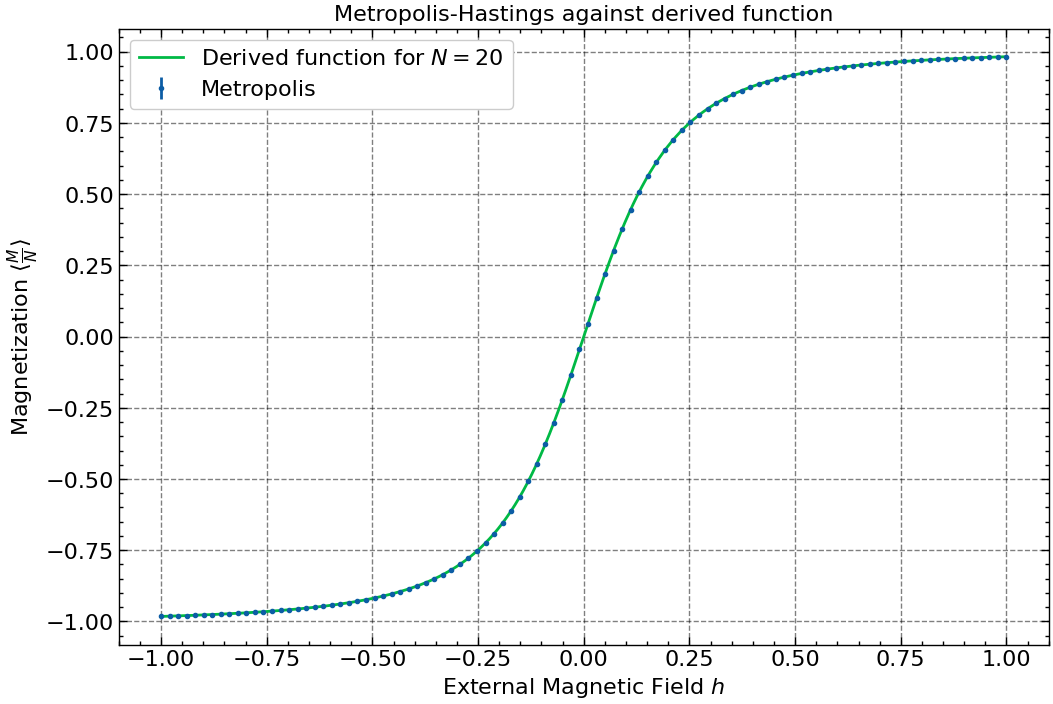

In [29]:
fig, ax = plt.subplots()
data = pd.read_csv('output/metropolis.csv')

ax.errorbar(data['h'], data['magnetization'], yerr=data['delta_magnetization'], label='Metropolis')
ax.plot(h_values, magnetization_per_spin_finite_N(0.75 / T, h_values / T, 20), '-', label='Derived function for $N=20$')

ax.set_title('Metropolis-Hastings against derived function')
ax.set_xlabel('External Magnetic Field $h$')
ax.set_ylabel('Magnetization $\\langle \\frac{M}{N} \\rangle$')
ax.legend()

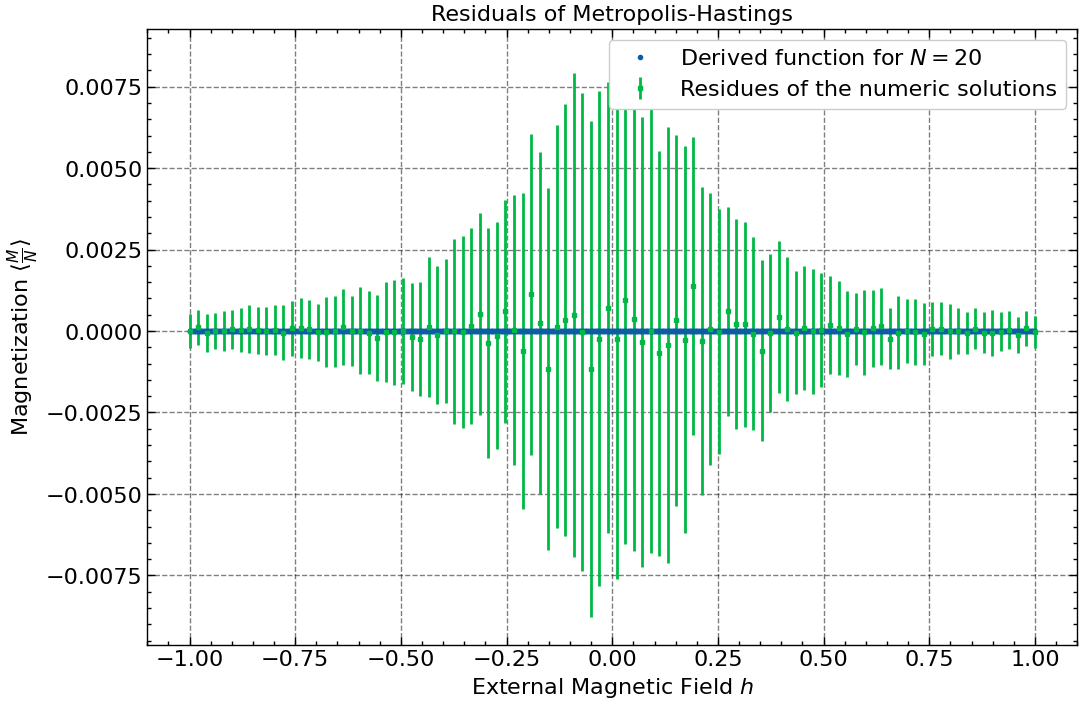

In [30]:
fig, ax = plt.subplots()
data = pd.read_csv('output/metropolis.csv')

ax.errorbar(h_values / T, [0] * len(h_values / T), label='Derived function for $N=20$')
ax.errorbar(data['h'], data['magnetization'] - magnetization_per_spin_finite_N(0.75 / T, data['h'] / T, 20), yerr=data['delta_magnetization'], label='Residues of the numeric solutions')

ax.set_title('Residuals of Metropolis-Hastings')
ax.set_xlabel('External Magnetic Field $h$')
ax.set_ylabel('Magnetization $\\langle \\frac{M}{N} \\rangle$')
ax.legend()

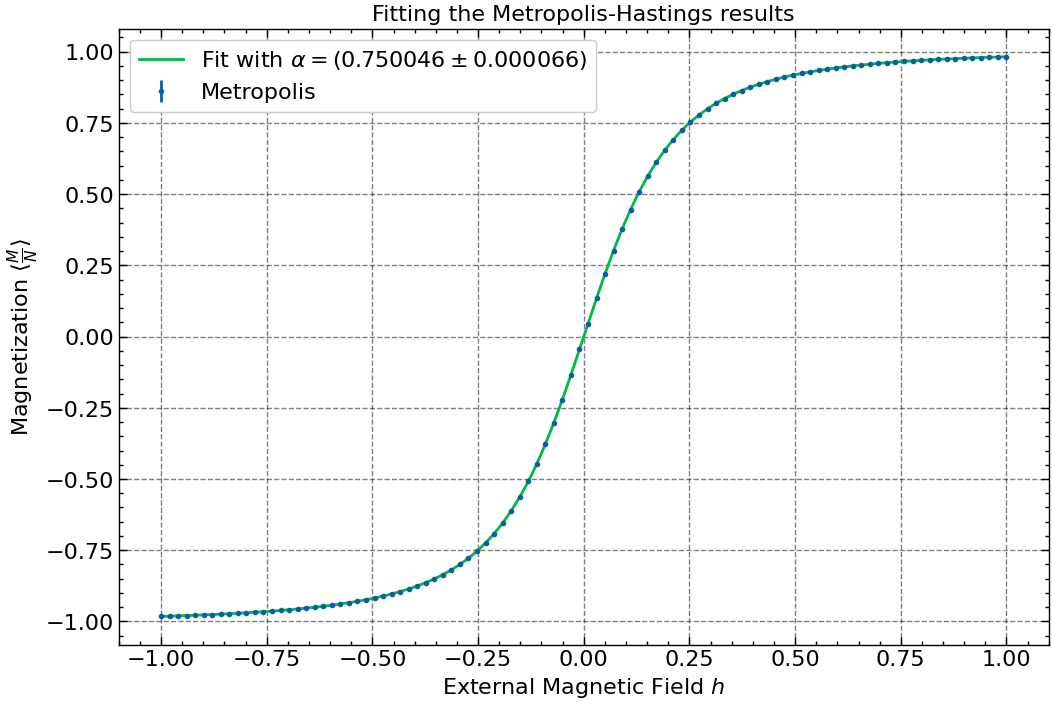

In [31]:
def fit(beta, h):
    return magnetization_per_spin_finite_N(beta[0], h / T, 20)

fig, ax = plt.subplots()

odr_model = Model(fit)
odr_data = RealData(data['h'], data['magnetization'])
odr_output = ODR(odr_data, odr_model, beta0=[0.5]).run()

ax.errorbar(data['h'], data['magnetization'], yerr=data['delta_magnetization'], label='Metropolis')
ax.plot(h_values, fit(odr_output.beta, h_values / T), '-', label=f'Fit with $\\alpha = ({odr_output.beta[0]:.6f} \\pm {odr_output.sd_beta[0]:.6f})$')

ax.set_title('Fitting the Metropolis-Hastings results')
ax.set_xlabel('External Magnetic Field $h$')
ax.set_ylabel('Magnetization $\\langle \\frac{M}{N} \\rangle$')
ax.legend()